### Content:

#### 1. Importing libraries and data
#### 2. Data prep for regression analysis
#### 3. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path: 
path = r'/Users/tuyetnguyen/Desktop/Career Foundry/Achievement 6/09-2023 Airbnb Listings and Neighborhoods Analysis'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'listings_prepared.csv'))

# Hypothesis: The higher the location score, the higher the pice per room.

### 2. Data prep for regression analysis

##### Extreme values checks


<Axes: xlabel='price_per_room', ylabel='Count'>

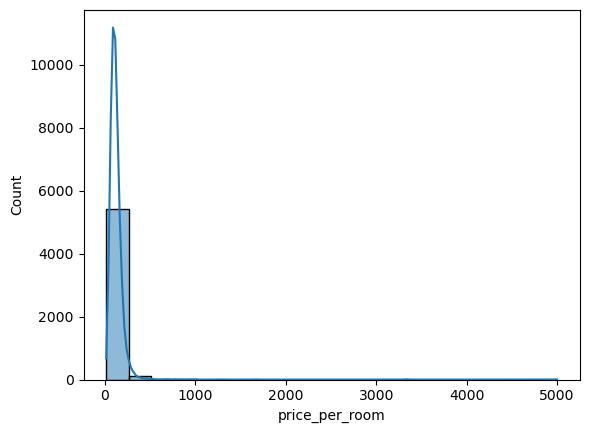

In [5]:
sns.histplot(df['price_per_room'], bins=20, kde = True) # shows extreme values for 'fat'

In [6]:
# Remove extreme values

filtered_df = df[df['price_per_room'] < 600] 
# rooms over $600 are unusually high-priced listings.

Text(0, 0.5, 'Price per room')

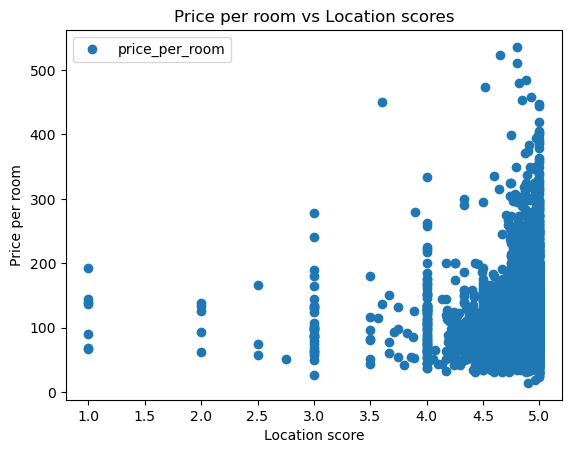

In [7]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

scat = filtered_df.plot(x = 'review_scores_location', y='price_per_room',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price per room vs Location scores')  
plt.xlabel('Location score')  
plt.ylabel('Price per room')  # Reshape the variables into NumPy arrays and put them into separate objects.

In [8]:
scat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_location.png'), bbox_inches = 'tight')

In [9]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = filtered_df['review_scores_location'].values.reshape(-1,1)
y = filtered_df['price_per_room'].values.reshape(-1,1)

In [12]:
X

array([[4.61],
       [5.  ],
       [3.5 ],
       ...,
       [5.  ],
       [4.7 ],
       [3.9 ]])

In [13]:
y

array([[120. ],
       [100. ],
       [ 81. ],
       ...,
       [215. ],
       [ 94.5],
       [280. ]])

In [14]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 3. Regression analysis


In [15]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [16]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

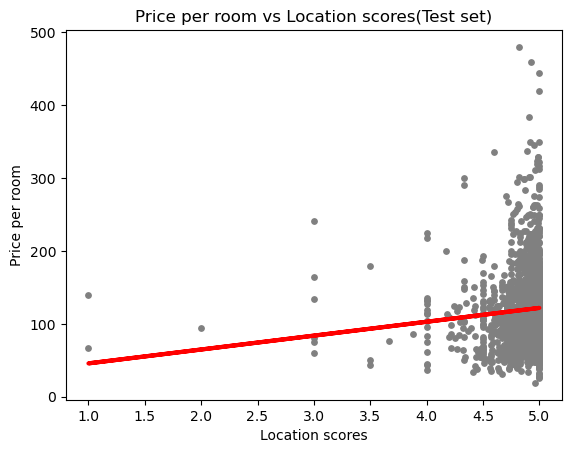

In [18]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price per room vs Location scores(Test set)')
plot_test.xlabel('Location scores')
plot_test.ylabel('Price per room')
plot_test.show()

When evaluating the model's performance on the test set, it became evident that the line failed to closely align with a substantial number of data points, indicating a limited ability to predict room prices based on location scores. This could be attributed to the presence of data bias, as certain unaccounted variables or external factors might be impacting the relationship between location scores and room prices. This suggests a need for a more comprehensive analysis to uncover and mitigate potential sources of bias, ultimately enhancing the model's predictive accuracy.

In [21]:
plot_test.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regression_test.png'), bbox_inches = 'tight')

AttributeError: 'function' object has no attribute 'savefig'

In [21]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [22]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[19.03183983]]
Mean squared error:  2988.696892959022
R2 score:  0.011488371615024251


In [23]:
y_predicted

array([[120.0373538 ],
       [116.61162263],
       [118.70512501],
       ...,
       [120.60830899],
       [120.41799059],
       [120.98894579]])

In [24]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,150.000000,120.037354
1,71.000000,116.611623
2,213.000000,118.705125
3,134.000000,117.563215
4,83.500000,121.940538
5,121.000000,120.417991
6,59.000000,118.705125
7,73.000000,121.940538
8,136.000000,121.179264
9,100.000000,119.466399


##### Compare how the regression fits the training set

In [26]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [27]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [28]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[19.03183983]]
Mean squared error:  3104.7270298990757
R2 score:  0.010765823098304206


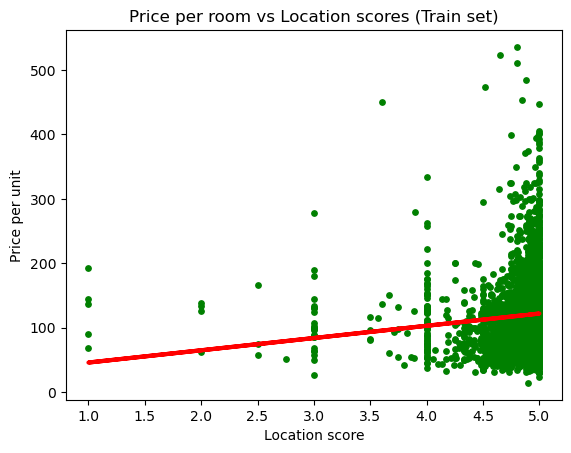

In [31]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price per room vs Location scores (Train set)')
plot_test.xlabel('Location score')
plot_test.ylabel('Price per unit')
plot_test.show()